# Data Science Challenge: Card Transactions!

This coding and analysis challenge is designed to test your skill and intuition analyzing real[-ish] world data. For the challenge, we will use credit card transactions data. Note that this dataset loosely resembles real transactional data from Capital One credit card customers, but the entities and relations within are purely fictional. No persons, places, or things lost their identity in the making of this dataset.

## Business Requirements

- Perform data analyze to determine structure within data 
- Build a predictive model to determine whether a given transaction will be fraudulent or not.
- Provide an estimate of performance using an appropriate sample.
- Explain the methodology of model building and development.
- Write a short report (typically 1-2 pages) on the problem, your approach, and results

## Objectives

The objective of this project is to:
- Build a predictive model to determine whether a given transaction will be fraudulent or not.
- Apply exploratory data analysis in determining factors associated with fraudulent transactions.
- Analyze the speed and quality of prediction, time required for training, algorithm's performance on test set.

<hr>

 # Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#open_the_data">Open the data file and study the general information</a></li>
        <li><a href="#prepare_the_data">Data preparation</a></li>
        <li><a href="#data_visualization">Exploratory Data Analysis</a></li>
        <li><a href="#modeling_process">Modeling Process</a></li>
        <li><a href="#model_training">Model Training</a></li>
        <li><a href="#model_analysis">Model Analysis</a></li>
        <li><a href="#model_testing">Model Testing</a></li>
        <li><a href="#overall_conclusion">Overall Conclusion</a></li>
    </ol>
</div>
<br>
<hr>

<div id="open_the_data">
    <h2>Open the data file and study the general information</h2> 
</div>

We require the following libraries: *pandas* and *numpy* for data preprocessing and manipulation, *matplotlib* and *seaborn* for data visualization, *scikit-learn* for building our machine learning algorithms

In [1]:
# import required modules
import requests
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import time
from datetime import datetime
from ipywidgets import widgets
from pandas_profiling import ProfileReport
from IPython.display import display

# matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn for statistical data visualization
import seaborn as sns

# import module for splitting and cross-validation using gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

# import modules for preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None # to avoid SettingWithCopyWarning after scaling

# import machine learning module from the sklearn library
from sklearn.dummy import DummyClassifier # import dummy classifier
from sklearn.tree import DecisionTreeClassifier # import decision tree classifier
from sklearn.linear_model import LogisticRegression # import logistic regression 
from sklearn.ensemble import RandomForestClassifier # import random forest algorithm
from catboost import CatBoostClassifier # import catboost classifier
from lightgbm import LGBMClassifier # import lightgbm classifier
from xgboost import XGBClassifier # import xgboost classifier

# import metrics for sanity check on model
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

# import warnings
import warnings
warnings.filterwarnings('ignore')

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


C:\Users\hotty\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Question 1: Load

In [2]:
# read the dataset using the compression zip
transactions = pd.read_json('https://github.com/CapitalOneRecruiting/DS/blob/master/transactions.zip?raw=true', compression='zip', lines=True)
 
print('Data has been read correctly!')

Data has been read correctly!


In [3]:
# generate profile for transactions data
profile = ProfileReport(transactions, title="Data profile report for transactions data", html={'style': {'full_width': True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# function to determine if columns in file have null values
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")
        
# function to display general information about the dataset
def get_info(df):
    """
    This function uses the head(), info(), describe(), shape() and duplicated() 
    methods to display the general information about the dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  # check this out
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [5]:
# study the general information about the transactions dataset 
print('General information about the transactions dataset')
get_info(transactions)

General information about the transactions dataset
----------------------------------------------------------------------------------------------------
Head:



accountNumber  customerId  creditLimit  availableMoney  \
0      737265056   737265056         5000          5000.0   
1      737265056   737265056         5000          5000.0   
2      737265056   737265056         5000          5000.0   
3      737265056   737265056         5000          5000.0   
4      830329091   830329091         5000          5000.0   

   transactionDateTime  transactionAmount         merchantName acqCountry  \
0  2016-08-13T14:27:32              98.55                 Uber         US   
1  2016-10-11T05:05:54              74.51          AMC #191138         US   
2  2016-11-08T09:18:39               7.47           Play Store         US   
3  2016-12-10T02:14:50               7.47           Play Store         US   
4  2016-03-24T21:04:46              71.18  Tim Hortons #947751         US   

  merchantCountryCode posEntryMode  ... echoBuffer currentBalance  \
0                  US           02  ...                       0.0   
1                  US           09  ...                       0.0   
2                  US           09  ...                       0.0   
3                  US           09  ...                       0.0   
4                  US           02  ...                       0.0   

  merchantCity merchantState merchantZip  cardPresent  posOnPremises  \
0                                               False                  
1                                                True                  
2                                               False                  
3                                               False                  
4                                                True                  

   recurringAuthInd expirationDateKeyInMatch isFraud  
0                                      False   False  
1                                      False   False  
2                                      False   False  
3                                      False   False  
4                                      False   False  

[5 rows x 29 columns]

----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  objec

None

----------------------------------------------------------------------------------------------------
Describe:



accountNumber    customerId    creditLimit  availableMoney  \
count   7.863630e+05  7.863630e+05  786363.000000   786363.000000   
mean    5.372326e+08  5.372326e+08   10759.464459     6250.725369   
std     2.554211e+08  2.554211e+08   11636.174890     8880.783989   
min     1.000881e+08  1.000881e+08     250.000000    -1005.630000   
25%     3.301333e+08  3.301333e+08    5000.000000     1077.420000   
50%     5.074561e+08  5.074561e+08    7500.000000     3184.860000   
75%     7.676200e+08  7.676200e+08   15000.000000     7500.000000   
max     9.993896e+08  9.993896e+08   50000.000000    50000.000000   

       transactionAmount        cardCVV     enteredCVV  cardLast4Digits  \
count      786363.000000  786363.000000  786363.000000    786363.000000   
mean          136.985791     544.467338     544.183857      4757.417799   
std           147.725569     261.524220     261.551254      2996.583810   
min             0.000000     100.000000       0.000000         0.000000   
25%            33.650000     310.000000     310.000000      2178.000000   
50%            87.900000     535.000000     535.000000      4733.000000   
75%           191.480000     785.000000     785.000000      7338.000000   
max          2011.540000     998.000000     998.000000      9998.000000   

       currentBalance  
count   786363.000000  
mean      4508.739089  
std       6457.442068  
min          0.000000  
25%        689.910000  
50%       2451.760000  
75%       5291.095000  
max      47498.810000

----------------------------------------------------------------------------------------------------


transactionDateTime merchantName acqCountry merchantCountryCode  \
count                786363       786363     786363              786363   
unique               776637         2490          5                   5   
top     2016-12-25T14:04:15         Uber         US                  US   
freq                      4        25613     774709              778511   

       posEntryMode posConditionCode merchantCategoryCode currentExpDate  \
count        786363           786363               786363         786363   
unique            6                4                   19            165   
top              05               01        online_retail        03/2029   
freq         315035           628787               202156           5103   

       accountOpenDate dateOfLastAddressChange transactionType echoBuffer  \
count           786363                  786363          786363     786363   
unique            1820                    2184               4          1   
top         2014-06-21              2016-03-15        PURCHASE              
freq             33623                    3819          745193     786363   

       merchantCity merchantState merchantZip posOnPremises recurringAuthInd  
count        786363        786363      786363        786363           786363  
unique            1             1           1             1                1  
top                                                                           
freq         786363        786363      786363        786363           786363


Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(786363, 29)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




### Conclusion

By looking at the general information about the data, we observe that the `transactions` data has 786363 rows and 29 columns. There are also no missing value in the dataset. We also observe that there are no duplicated rows in the data. From the data types within the data, we noticed that 9 columns have numeric datatypes, 17 columns have categorical datatypes, and 3 columns have boolean datatypes.

<div id="prepare_the_data">
    <h2>Data preparation</h2> 
</div>

One step in data preparation is to change datatypes. We do this to reduce memory usage and improve computational efficiency. In this section, we would also carry out some feature engineering to create new features that will help our understanding of transactions within the data.

### Change Datatypes

In [6]:
# change data to the right type
def change_datatype(df, cols, type_val):
    for col in cols:
        df[col] = df[col].astype(type_val)
        
change_datatype(transactions, ['transactionDateTime', 'currentExpDate', 'accountOpenDate'], 'datetime64[ns]')
change_datatype(transactions, ['accountNumber', 'customerId', 'creditLimit', 'cardCVV', 'enteredCVV', 'cardLast4Digits'], 'int32')
change_datatype(transactions, ['availableMoney', 'transactionAmount', 'currentBalance'], 'float32')

We changed datatype to reduce memory usage during computation which may come in handy during model building and analysis. Now we can carry out exploratory data analysis to investigate the data even further.

### Feature Engineering

In [7]:
# function to make new features 
def create_features(data):
    data['transactionMonth'] = data['transactionDateTime'].dt.month_name()
    data['transactionDayofWeek'] = data['transactionDateTime'].dt.day_name()
    data['transactionHour'] = data['transactionDateTime'].dt.hour
    data['transactionMinutes'] = data['transactionDateTime'].dt.minute
    data['transactionSeconds'] = data['transactionDateTime'].dt.second
    
# create new feature
create_features(transactions)
change_datatype(transactions, ['transactionHour', 'transactionMinutes', 'transactionSeconds'], 'int32') # reduce memory usage by changing datatypes

In [8]:
# check data information
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             786363 non-null  int32         
 1   customerId                786363 non-null  int32         
 2   creditLimit               786363 non-null  int32         
 3   availableMoney            786363 non-null  float32       
 4   transactionDateTime       786363 non-null  datetime64[ns]
 5   transactionAmount         786363 non-null  float32       
 6   merchantName              786363 non-null  object        
 7   acqCountry                786363 non-null  object        
 8   merchantCountryCode       786363 non-null  object        
 9   posEntryMode              786363 non-null  object        
 10  posConditionCode          786363 non-null  object        
 11  merchantCategoryCode      786363 non-null  object        
 12  cu

In [9]:
# check data
transactions.head()

accountNumber  customerId  creditLimit  availableMoney transactionDateTime  \
0      737265056   737265056         5000          5000.0 2016-08-13 14:27:32   
1      737265056   737265056         5000          5000.0 2016-10-11 05:05:54   
2      737265056   737265056         5000          5000.0 2016-11-08 09:18:39   
3      737265056   737265056         5000          5000.0 2016-12-10 02:14:50   
4      830329091   830329091         5000          5000.0 2016-03-24 21:04:46   

   transactionAmount         merchantName acqCountry merchantCountryCode  \
0          98.550003                 Uber         US                  US   
1          74.510002          AMC #191138         US                  US   
2           7.470000           Play Store         US                  US   
3           7.470000           Play Store         US                  US   
4          71.180000  Tim Hortons #947751         US                  US   

  posEntryMode  ... cardPresent posOnPremises recurringAuthInd  \
0           02  ...       False                                  
1           09  ...        True                                  
2           09  ...       False                                  
3           09  ...       False                                  
4           02  ...        True                                  

  expirationDateKeyInMatch isFraud  transactionMonth  transactionDayofWeek  \
0                    False   False            August              Saturday   
1                    False   False           October               Tuesday   
2                    False   False          November               Tuesday   
3                    False   False          December              Saturday   
4                    False   False             March              Thursday   

   transactionHour transactionMinutes transactionSeconds  
0               14                 27                 32  
1                5                  5                 54  
2                9                 18                 39  
3                2                 14                 50  
4               21                  4                 46  

[5 rows x 34 columns]

### Conclusion

In this section, we changed datatype of some features to the right datatype. This helps reduce memory usage. We added new features to the dataframe. One important feature added is the `transactionMonth` and `transactionHour`. this would be helpful in know the period that fraudulent transactions usually occur. 

<div id="exploratory_data_analysis">
    <h2>Exploratory Data Analysis</h2> 
</div>

In this section, we will be looking at what our data can tell us. Can we draw up relationships between variables or is there an anomaly that we can observe. Exploratory Data Analysis is usually open-ended but the goal of EDA is to determine what our data can tell us! We will be looking for patterns, relationships in our data. This will be interesting themselves (for instance finding a correlation between two variables) or they can be used to inform modeling decisions like which features to include.

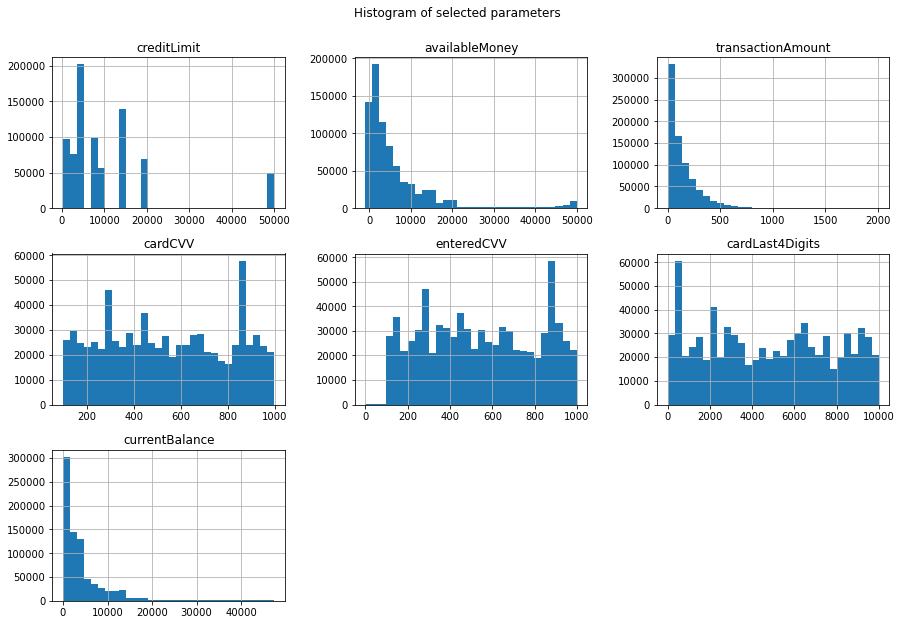

In [10]:
# Plot histogram of parameters
transactions[['creditLimit', 'availableMoney', 'transactionAmount', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'currentBalance']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram of selected parameters', y=0.95);

The chart above shows the histogram of selected variables. The plot of `availableMoney`, and `transactionAmount` are all **skewed left**. In `availableMoney` and `transactionAmount`, the peak is around the 0 mark. For `transactionAmount`, the spread of the data is from 0 to 2011 with a mean of 136.98 and a median at 87.9. Similarly, for `availableMoney`, the data is spread from -1005 to 50000 with a mean of 6250.72 and a median of 3184.86. By looking at the histogram, we can tell the data has significant outliers. 

In [11]:
# describe numerical features
transactions.describe()

accountNumber    customerId    creditLimit  availableMoney  \
count   7.863630e+05  7.863630e+05  786363.000000   786363.000000   
mean    5.372326e+08  5.372326e+08   10759.464459     6250.559570   
std     2.554211e+08  2.554211e+08   11636.174890     8879.510742   
min     1.000881e+08  1.000881e+08     250.000000    -1005.630005   
25%     3.301333e+08  3.301333e+08    5000.000000     1077.420044   
50%     5.074561e+08  5.074561e+08    7500.000000     3184.860107   
75%     7.676200e+08  7.676200e+08   15000.000000     7500.000000   
max     9.993896e+08  9.993896e+08   50000.000000    50000.000000   

       transactionAmount        cardCVV     enteredCVV  cardLast4Digits  \
count      786363.000000  786363.000000  786363.000000    786363.000000   
mean          136.982986     544.467338     544.183857      4757.417799   
std           147.691971     261.524220     261.551254      2996.583810   
min             0.000000     100.000000       0.000000         0.000000   
25%            33.650002     310.000000     310.000000      2178.000000   
50%            87.900002     535.000000     535.000000      4733.000000   
75%           191.479996     785.000000     785.000000      7338.000000   
max          2011.540039     998.000000     998.000000      9998.000000   

       currentBalance  transactionHour  transactionMinutes  transactionSeconds  
count   786363.000000    786363.000000       786363.000000       786363.000000  
mean      4508.262695        11.511333           29.518682           29.510929  
std       6456.575684         6.921098           17.325778           17.315639  
min          0.000000         0.000000            0.000000            0.000000  
25%        689.909973         6.000000           15.000000           15.000000  
50%       2451.760010        12.000000           30.000000           30.000000  
75%       5291.094971        18.000000           45.000000           45.000000  
max      47498.808594        23.000000           59.000000           59.000000

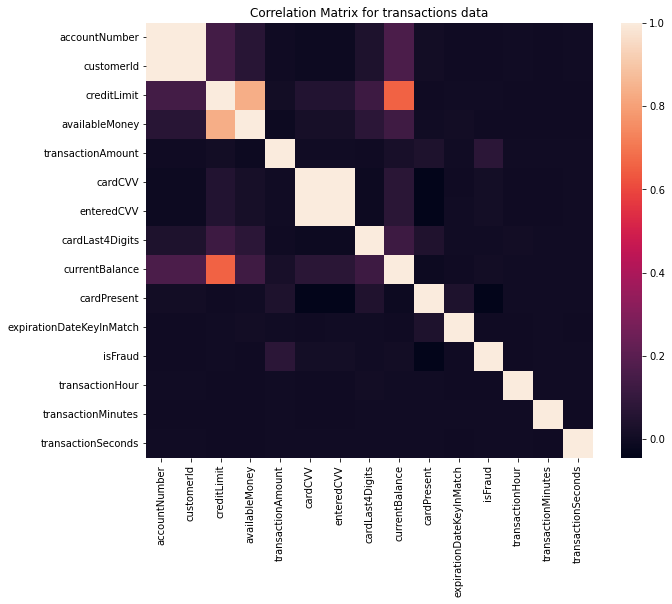

In [12]:
# correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = transactions.corr()
sns.heatmap(corr_matrix, annot = False)
plt.title('Correlation Matrix for transactions data')
plt.show()

### Question 2: Plot

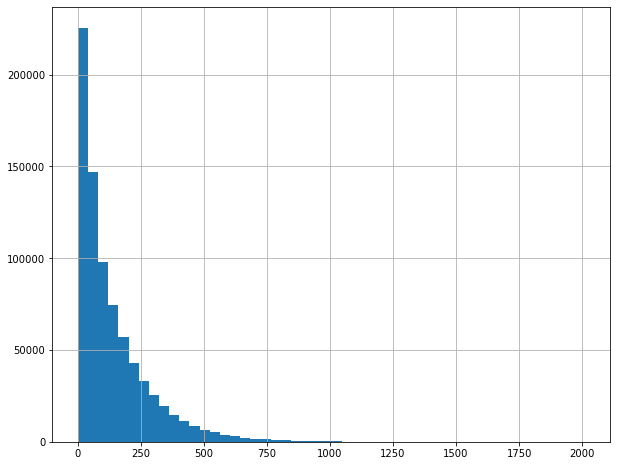

In [13]:
# histogram of the processed amounts of each transaction
transactions.transactionAmount.hist(bins = 50, figsize=(10, 8));

### Conclusion

For the `transactionAmount`, we noticed that there are 66038 distinct value representing 8.4% of that variable. The mean of the `transactionAmount` is 136.98 with a minimum value of 0, and a maximum at 2011.54.

### Question 3: Data Wrangling - Duplicate Transactions

Let's perform data wrangling and preprocess the data in order to analyze the data. Looking 